In [11]:
from historicalDataSource.cryptocompare import cryptocompare
import holoviews as hv

In [12]:
product_code = 'BTC_JPY'
exchange = ['bitFlyer', 'Quoine']
candlestickMaster = []

for e in exchange:
    candlestickMaster.append({'exchange': e, 'candlestick': cryptocompare(product_code,e).getHistoricalCandlestick()})

In [13]:
print(cryptocompare(product_code,e).URL)

https://min-api.cryptocompare.com/data/histominute?fsym=BTC&tsym=JPY&limit=2000&e=Quoine


In [4]:
historicalPrice = []
hv.extension('matplotlib')
curve = hv.Curve(([], []))

In [5]:
for c in candlestickMaster:
    datetime = []
    price = []
    for item in c['candlestick']['Data']:
        datetime.append(item['time'])
        price.append(item['close'])
    historicalPrice.append({'exchange': c['exchange'],'datetime': datetime, 'price': price})

In [6]:
historicalPrice[0]['exchange']

'bitFlyer'

In [7]:
for e in exchange:
    historicalPriceItem = [x for x in historicalPrice if x['exchange'] == e][0]
    curveItem = hv.Curve((historicalPriceItem['datetime'], historicalPriceItem['price']), label = historicalPriceItem['exchange'])
    curve = curve * curveItem

:Overlay
   .Curve.I         :Curve   [x]   (y)
   .Curve.BitFlyer  :Curve   [x]   (y)
   .Curve.Coincheck :Curve   [x]   (y)
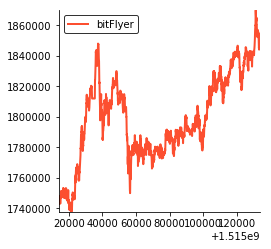

In [8]:
curve